# Linear Regression

Let's fabricate some data that shows a roughly linear relationship between page speed and amount purchased:

In [35]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
%matplotlib inline
from pylab import *


messages = pd.read_csv('classification_train.tsv', sep='\t',
                           names=["Product", "Brand","Category"],low_memory=False)
messages.head()

,Product,Brand,Category
0,120GB Hard Disk Drive with 3 Years Warranty fo...,3950,8
1,TOSHIBA SATELLITE L305-S5919 LAPTOP LCD SCREEN...,35099,324
2,Hobby-Ace Pixhawk PX4 RGB External LED Indicat...,21822,510
3,Pelicans mousepad,44629,260
4,P4648-60029 Hewlett-Packard Tc2100 System Board,42835,68


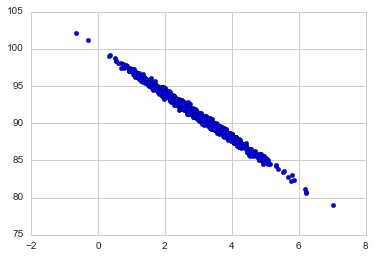

In [36]:
Brand = np.random.normal(3.0, 1.0, 1000)
Category = 100 - (Brand + np.random.normal(0, 0.1, 1000)) * 3

scatter(Brand, Category)

As we only have two features, we can keep it simple and just use scipy.state.linregress:

In [37]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(Brand, Category)


Not surprisngly, our R-squared value shows a really good fit:

In [38]:
r_value ** 2

0.99031803207003177

Let's use the slope and intercept we got from the regression to plot predicted values vs. observed:

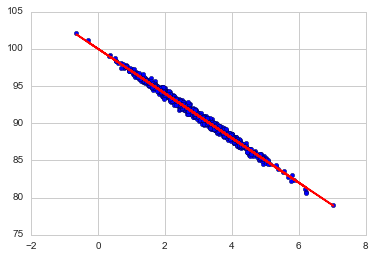

In [39]:
import matplotlib.pyplot as plt

def predict(x):
    return slope * x + intercept

fitLine = predict(Brand)

plt.scatter(Brand, Category)
plt.plot(Brand, fitLine, c='r')
plt.show()

## Activity

Try increasing the random variation in the test data, and see what effect it has on the r-squared error value.

In [32]:
# Set up X as median room values
X = messages.category

# Use v to make X two-dimensional
X = np.vstack(messages.Category)

# Set up Y as the target price of the houses.
Y = messages.Brand

AttributeError: 'DataFrame' object has no attribute 'category'

In [58]:
# Set up X as median room values
X = messages.Category

In [59]:
X = np.vstack(messages.Category)

In [60]:
X.shape

(1000000, 1)

In [61]:
Y = messages.Brand

In [62]:
# Create the X array in the form [X 1]
X = np.array( [ [value,1] for value in X ] )

In [52]:
messages['Category'].fillna(0)

0           8
1         324
2         510
3         260
4          68
5           6
6         172
7         616
8         248
9         313
10         68
11        450
12        179
13        366
14        666
15        625
16        647
17        625
18        494
19        520
20         79
21        260
22        260
23        415
24        390
25        618
26         71
27        442
28         95
29        388
         ... 
999970    557
999971    269
999972     67
999973    415
999974    598
999975     71
999976    666
999977     71
999978    466
999979    539
999980    530
999981    358
999982    442
999983    557
999984     59
999985    297
999986    530
999987    603
999988     71
999989     71
999990    666
999991    647
999992    437
999993    390
999994    492
999995    322
999996    685
999997    250
999998    625
999999    646
Name: Category, dtype: object

In [54]:
messages.size

3000000

In [56]:
messages['Brand'].

AttributeError: 'Series' object has no attribute 'find'

In [63]:
# Now get out m and b values for our best fit line
m, b = np.linalg.lstsq(X, Y)[0]

ValueError: could not convert string to float: 'bid'

In [64]:
messages.describe()

,Product,Brand,Category
count,1000000,999997,999997
unique,887174,35703,610
top,Professional ULTRA PLUS SanDisk 32GB MicroSDHC...,42835,260
freq,3881,41745,60009


In [65]:
# Grab the output and set as X and Y test and train data sets!
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X,messages.Brand)

In [66]:
# Import for Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression

In [67]:
# Create a LinearRegression Object
lreg = LinearRegression()

In [68]:
# Data Columns
X_multi = messages.drop('Brand',1)

# Targets
Y_target = messages.Brand

TypeError: invalid file:                                                   Product  Brand Category
0       120GB Hard Disk Drive with 3 Years Warranty fo...   3950        8
1       TOSHIBA SATELLITE L305-S5919 LAPTOP LCD SCREEN...  35099      324
2       Hobby-Ace Pixhawk PX4 RGB External LED Indicat...  21822      510
3                                       Pelicans mousepad  44629      260
4         P4648-60029 Hewlett-Packard Tc2100 System Board  42835       68
5                  Ectaco EI900 SD Card English - Italian    249        6
6       Zippered Pocket Black School Laptop Tablet Dua...   4342      172
7                GP Mtr, 3 Ph, ODP, 3 HP, 1800 rpm, 182TC  42618      616
8       DIGI CM 16 PORT RJ-45 CONSOLE SERVER - Model#:...  37012      248
9       Lenovo Ibm Thinkpad R52-1859 Laptop AC adapter...   2024      313
10      MSI FM2-A85XMA-E35 - FM2 Trinity AMD A85X Chip...  28110       68
11      Zerlar Canvas Camera Shoulder Bag DSLR Bag Mes...  15726      450
12      Generic New Laptop LCD Screen Video Flex Cable...   6584      179
13      Lenovo 0B50684 TANDBERG DATA RDX 320GB CARTRID...  37923      366
14              Epson T559620 Light Magenta Ink Cartridge  28653      666
15      Xerox 106R2259 Yellow Toner Cartridge, 1000 Yield  36778      625
16      ATC High Capacity 5200mAh 14.4V Replacement Li...  41145      647
17      Samsung ML-2010, 2510, 2570, 2571N Toner Cartr...   6584      625
18      [3 PACK] Crystal Clear Invisible HD Screen Pro...  15966      494
19                           Panasonic TX-48CW304 Schwarz   1584      520
20      Canon 7982A001 Exchange Roller Kit for DR-2050...  43043       79
21      Desert Vegetation Clouds Before A Rain Placema...   4869      260
22      3001 Katsushika Oi - Night Scene in the Yoshiw...  41186      260
23      HP Pavilion dv6-1102tx Laptop Screen 15.6 LCD ...   6911      415
24      USB 2.0 Printer/Device Cable, Black, Type A Ma...  18317      390
25      Professional Kingston 4GB MicroSDHC Card for A...  11580      618
26      Rikki KnightTM Letter "L" Monogram Initials Pa...  36274       71
27      OEM Engine Computer Programmed & Flashed 2001 ...  28421      442
28      2PORT 1-LOCAL PS2 VGA OMNIVIEWREVERSE KVM SWIT...  15557       95
29      Compatible Seiko IR-90 Black Ink Rollers , Wor...   4229      388
...                                                   ...    ...      ...
999970  HP D3T42AT 14" LED Notebook - Intel Celeron B8...  42835      557
999971  Tripp Lite Tripp Lite Power Strip Rackmount Me...  13325      269
999972  Fincibo TM Motorola Atrix 3 HD MB886 Dinara Ac...  18156       67
999973  Sony VAIO VPC-EA35FL/G laptop 14.0" WXGA++ HD+...  35585      415
999974  500GB 7200rpm 2.5" Laptop Hard Drive for Toshi...  18182      598
999975  Viva 360 Degree Rotating Stand Smart Cover Veg...  24321       71
999976  C0033 Compatible, Remanufactured, 18C0033 #33 ...  17430      666
999977  Rikki KnightTM Colorful Hipster Glasses on Bla...  36274       71
999978  Oppo R1 R829T Case Stand with Quick Camera Acc...  43042      466
999979                               BURTON Laptop Sleeve  19159      539
999980  6COM CWDM SFP Optical Transceiver 2.5G 1570nm ...  17652      530
999981              Laptop DC Jack for Sony Vaio PCG-3E2L   4229      358
999982  06-09 KIA Sedona Entourage Engine Computer ECM...  29925      442
999983  HP EliteBook 8460p B2F58EC 14" LED Notebook - ...  42835      557
999984  JMC083 2GB Libra USB Flash Drive with Jewelry ...  43606       59
999985  iPad mini and Retina iPad mini 2 Stand Smart c...  19457      297
999986  Juniper Networks® SFP-1GE-SX Compatible 1000Ba...  18548      530
999987  MicroNet FDMSODDDR2667K2-4GB 4GB Kit 2x2GB Pc2...  35099      603
999988  Case Logic ETC-110 Folio for 10-Inch iPad 2 an...  10515       71
999989  ULAK 360 Rotating Magnetic Synthetic Leather s...    516       71
999990  Pantone Pigmented Black Ink for Epson Stylus 9500   7665      666
999991  Dell Studio XPS 16, Studio XPS 1640 Compatible...  34996      647
999992  NETGEAR ProSafe GS752TXS Smart Switch - switch...  41217      437
999993  PASBUY®1196/6Ft 2 Pack USB 2.0 Printer Cables ...  27217      390
999994  Kingston Memory Flash CF/16GB-U2 16GB CompactF...  11580      492
999995           IBM 200GB SATA 1.8IN MLC SSD / 43W7746 /   4361      322
999996  D-Link Wireless N-300 Mbps USB Wi-Fi Network A...  26579      685
999997  Creatures Design Protective Decal Skin Sticker...   1498      250
999998  InkGrabber © Konica - Minolta A0WG02F Remanufa...  29002      625
999999                     887 Vdsl/ads Multi-mode Router  28720      646

[1000000 rows x 3 columns]

In [80]:
# Implement Linear Regression
lreg.fit(X_multi,Y_target)

ValueError: could not convert string to float: 'cid'

In [76]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
messages.Category1 = lb.fit_transform(messages.Category)

TypeError: unorderable types: str() > float()

ValueError: could not convert string to float: 'cid'

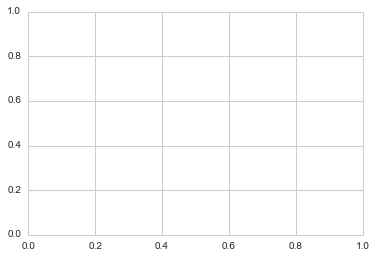

In [77]:
# First the original points, Price vs Avg Number of Rooms
plt.plot(messages.Category,messages.Brand,'o')

# Next the best fit line
x= messages.Category
plt.plot(x, m*x + b,'r',label='Best Fit Line')

In [78]:
messages.interpolate().plot()

TypeError: Cannot interpolate with all NaNs.

In [72]:
print ('The estimated intercept coefficient is %.2f ' %lreg.intercept_)

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [73]:
print ('The number of coefficients used was %d ' % len(lreg.coef_))

AttributeError: 'LinearRegression' object has no attribute 'coef_'